In [412]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [413]:
arxiv_data = pd.read_csv("./wiki.csv",index_col=0)
arxiv_data = arxiv_data.groupby("Title").filter(lambda x: len(x) == 1)
arxiv_data = arxiv_data[["Genre", "Plot"]]

# Extract tags

In [414]:
arxiv_data

,Genre,Plot
Release Year,,
1901,unknown,"A bartender is working at a saloon, serving dr..."
1901,unknown,"The moon, painted with a smiling face hangs ov..."
1901,unknown,"The film, just over a minute long, is composed..."
1901,unknown,Lasting just 61 seconds and consisting of two ...
1903,western,The film opens with two bandits breaking into ...
...,...,...
2014,unknown,"The film begins in 1919, just after World War ..."
2017,comedy,"Two musicians, Salih and Gürkan, described the..."
2017,comedy,"Zafer, a sailor living with his mother Döndü i..."


In [415]:
setTegs = arxiv_data["Genre"].apply(lambda x: x.lstrip().replace(" & ", ", ").replace(" - ", ", ").replace(" / ", ", ").replace("-", ", ").replace(",", ", ").replace("/", ", ").replace("&", ", ").split(", ")).explode().unique()
setTegs.sort()

setTegs = list(map(lambda x: x.lstrip(), setTegs))

decode = {}
encode = {}
decodeKeys = np.array(range(len(setTegs)))
for i in range(len(setTegs)):
    decode[i] = setTegs[i]
    encode[setTegs[i]] = i
ohe = tf.one_hot(decodeKeys, len(setTegs))
decode

{0: '',
 1: '',
 2: '007',
 3: '1 girl',
 4: '3',
 5: '3 suitors',
 6: '3d',
 7: 'action',
 8: 'action comedy',
 9: 'adult',
 10: 'adult comedy',
 11: 'adventure',
 12: 'adventure drama',
 13: 'adventure science fantasy',
 14: 'age',
 15: 'age drama',
 16: 'ancient',
 17: 'animated',
 18: 'animation',
 19: 'anime',
 20: 'anthology',
 21: 'apocalyptic',
 22: 'apocalyptic science fiction',
 23: 'art film',
 24: 'art house',
 25: 'arts',
 26: 'asin',
 27: 'b.r films',
 28: 'biker',
 29: 'bio',
 30: 'biographical',
 31: 'biographical drama',
 32: 'biography',
 33: 'biopic',
 34: 'black comedy',
 35: 'buddy comedy',
 36: 'business',
 37: 'can ',
 38: 'chanbara',
 39: 'charmy kaur',
 40: 'chess)',
 41: 'children',
 42: "children's",
 43: "children's film",
 44: 'cinekorn entertainment',
 45: 'cinema',
 46: 'com',
 47: 'comedy',
 48: 'comedy ',
 49: 'comedy; 6 separate stories',
 50: 'costume',
 51: 'crime',
 52: 'crime drama',
 53: 'crime thriller',
 54: 'crime.',
 55: 'cult',
 56: 'cyberpun

In [416]:
def decodeTags(lst, encode):
    out = np.array(list(map(lambda y: ohe[encode[y.lstrip()]] ,np.array(lst.lstrip().replace(" & ", ", ").replace(" - ", ", ").replace(" / ", ", ").replace("-", ", ").replace(",", ", ").replace("/", ", ").replace("&", ", ").split(", ")))))
    return out

ds2 = arxiv_data.dropna()[arxiv_data['Genre'] != "unknown"]
ds2 = ds2.assign(genList2= ds2.loc[:,"Genre"].apply(lambda x: np.sum(decodeTags(x, encode), axis=0)))
for i in range(len(setTegs)):
    ds2[setTegs[i]] = ds2["genList2"].map(lambda x: x[i])
arxiv_data = ds2
arxiv_data

/var/folders/f1/kt7zkm5s0jl83qydm2tzz5180000gp/T/ipykernel_78078/2025878000.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds2[setTegs[i]] = ds2["genList2"].map(lambda x: x[i])
/var/folders/f1/kt7zkm5s0jl83qydm2tzz5180000gp/T/ipykernel_78078/2025878000.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds2[setTegs[i]] = ds2["genList2"].map(lambda x: x[i])
/var/folders/f1/kt7zkm5s0jl83qydm2tzz5180000gp/T/ipykernel_78078/2025878000.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

,Genre,Plot,genList2,,007,1 girl,3,3 suitors,3d,action,...,yakuza,yakuza film,yash dasgupta,yash raj films,yogesh dattatraya gosavi's directorial debut. [9],youth drama,youth music drama,yuen lai,zombie comedy,zombie horror
Release Year,,,,,,,,,,,,,,,,,,,,,
1903,western,The film opens with two bandits breaking into ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,comedy,The film is about a family who move to the sub...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,short,The Rarebit Fiend gorges on Welsh rarebit at a...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,short action/crime western,The film features a train traveling through th...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1907,biographical,Boone's daughter befriends an Indian maiden as...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,drama film,"Zeynep lost her job at weaving factory, and he...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,comedy,"Two musicians, Salih and Gürkan, described the...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,comedy,"Zafer, a sailor living with his mother Döndü i...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [417]:
print(f"There are {len(arxiv_data)} rows in the dataset.")

There are 25118 rows in the dataset.


# Keep  only first n tags

In [418]:
nTop = 10
topTags = arxiv_data.iloc[:,3:].sum().sort_values(ascending=False)[1:nTop+1]
indTopTags = list(map(lambda x: encode[x], topTags.index))
#topTags
indTopTags.sort()

In [419]:
decode = {}
encode = {}
decodeKeys = np.array(range(len(topTags)))
for i in range(len(topTags)):
    decode[i] = topTags.index[i]
    encode[topTags.index[i]] = i

print(decode)
print(encode)
print(indTopTags)
topTags

{0: 'comedy', 1: 'action', 2: 'romance', 3: 'horror', 4: 'thriller', 5: 'western', 6: 'crime', 7: 'adventure', 8: 'musical', 9: 'family'}
{'comedy': 0, 'action': 1, 'romance': 2, 'horror': 3, 'thriller': 4, 'western': 5, 'crime': 6, 'adventure': 7, 'musical': 8, 'family': 9}
[259, 284, 402, 448, 543, 605, 667, 756, 922, 964]


comedy       5424.0
action       1802.0
romance      1536.0
horror       1221.0
thriller     1200.0
western       852.0
crime         821.0
adventure     660.0
musical       641.0
family        446.0
dtype: float32

In [420]:
dataSet = arxiv_data.iloc[:,:].drop(set(setTegs) - set(topTags.index),axis=1)
dataSet["genList2"] = dataSet["genList2"].map(lambda x: np.take(x,indTopTags))
dataSet = dataSet[dataSet['genList2'].apply(lambda x: sum(list(map(lambda y: int(y), x)))) >= 1]
dataSet

,Genre,Plot,genList2,action,adventure,comedy,crime,family,horror,musical,romance,thriller,western
Release Year,,,,,,,,,,,,,
1903,western,The film opens with two bandits breaking into ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1904,comedy,The film is about a family who move to the sub...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1907,comedy,Before heading out to a baseball game at a nea...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1908,comedy,A young couple decides to elope after being ca...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1908,western,The film opens in a town on the Mexican border...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,comedy,"Şahin K. is a wealthy and famous (or, rather, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,comedy-drama,"Abandoned with a son by her husband years ago,...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,comedy-drama,"Zephyr is a strong-willed little girl, spendin...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
dataSet2 = dataSet.reset_index(drop=True, inplace=False)
dataSet2 = dataSet2[dataSet2['Plot'].apply(lambda x: len(str(x).split())) > 20]
z = dataSet2["genList2"].apply(lambda x: str(x)).value_counts(ascending=True) != 1
delLst = []

for i,k in zip(z.values, z.index):
    if not i:
        delLst.append(k)

dataSet2 = dataSet2[dataSet2['genList2'].apply(lambda x: str(x)).map(lambda x: x not in delLst)]
dataSet2

,Genre,Plot,genList2,action,adventure,comedy,crime,family,horror,musical,romance,thriller,western
0,western,The film opens with two bandits breaking into ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,comedy,The film is about a family who move to the sub...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,comedy,Before heading out to a baseball game at a nea...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,comedy,A young couple decides to elope after being ca...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,western,The film opens in a town on the Mexican border...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13051,comedy-drama,Emrah is a dreamer who hopes to be a great dir...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13052,comedy,"Şahin K. is a wealthy and famous (or, rather, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13053,comedy-drama,"Abandoned with a son by her husband years ago,...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13054,comedy-drama,"Zephyr is a strong-willed little girl, spendin...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [422]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import re
nlp = English()
def cleanPlot(qq):
    tokenizer = nlp.tokenizer(qq.lower())
    tokenizer = " ".join([str(x) if str(x) not in STOP_WORDS else "" for x in tokenizer])
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punc = ""
    for char in tokenizer:
        if char not in punctuations:
            no_punc = no_punc + char
    WHITE_SPACE_PATTERN = re.compile(r' +')
    return re.sub(WHITE_SPACE_PATTERN, ' ', no_punc.strip())

dataSet2['Plot'] = dataSet2['Plot'].apply(lambda x:cleanPlot(x))
dataSet2

,Genre,Plot,genList2,action,adventure,comedy,crime,family,horror,musical,romance,thriller,western
0,western,film opens bandits breaking railroad telegraph...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,comedy,film family suburbs hoping quiet life things s...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,comedy,heading baseball game nearby ballpark sports f...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,comedy,young couple decides elope caught midst romant...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,western,film opens town mexican border poker game goin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13051,comedy-drama,emrah dreamer hopes great director trying shoo...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13052,comedy,şahin k wealthy famous infamous man discontent...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13053,comedy-drama,abandoned son husband years ago signora enrica...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13054,comedy-drama,zephyr strong willed little girl spending summ...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split prepared dataset

In [423]:
test_split = 0.1

# Initial train and test split.
train_df, test_df = train_test_split(
    dataSet2,
    test_size=test_split,
    stratify=dataSet2["genList2"].apply(lambda x: str(x)).values,
    random_state=35174
)

val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 11484
Number of rows in validation set: 638
Number of rows in test set: 638


In [424]:
max_seqlen = 150
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["genList2"].values)
    label_binarized = labels.numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["Plot"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [425]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [426]:
#preview

def decodeFunc(lst):
    out = []
    for k in range(len(lst)):
        if int(lst[k]) == 1:
            out.append(decode[k])
    return out

text_batch, label_batch = next(iter(train_dataset))


for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {decodeFunc(label[0])}")
    print(" ")

Abstract: b'soon local villagers enraged young woman murdered count priest blessing rise set fire castle dracula count safely asleep solid stone chamber villagers return home find single woman child village slaughtered church bats \r\n falsely accused rape burgomasters spurned daughter libertine paul carlson flees kleinenberg authorities jumping nearby coach driverless heads great speed deposited near count dracula mountaintop castle initially welcomed count beautiful woman named tania later reveals imprisoned dracula mistress paul later liaison tania concludes lovemaking trying bite neck dracula enters casually throwing paul efforts stop savagely stabs tania death dagger betraying vampire servant klove dismembers body dissolves pieces bath acid locked room high castle paul uses tied bed curtains climb lower window line withdrawn klove finds count chamber \r\n paul sober brother simon carlson simon fiancee sarah framsen come searching maid tavern directs castle investigate dracula imme

# Embeddings

In [427]:
vocabulary = set()
train_df["Plot"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

81018


In [428]:
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=4, output_mode="tf_idf"
)

with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

# Model

In [429]:
#import tensorflow_addons as tfa

def make_model():
    shallow_mlp_model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(512, activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation="sigmoid"),
        ]
    )
    return shallow_mlp_model

# trainings

In [430]:
epochs = 3

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),"categorical_accuracy"]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)


def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()




Epoch 1/3
90/90 [==============================] - 19s 202ms/step - loss: 0.7225 - precision_31: 0.4257 - recall_31: 0.3020 - categorical_accuracy: 0.4121 - val_loss: 0.2788 - val_precision_31: 0.7442 - val_recall_31: 0.4513 - val_categorical_accuracy: 0.6395
Epoch 2/3
90/90 [==============================] - 18s 197ms/step - loss: 0.1877 - precision_31: 0.8142 - recall_31: 0.6033 - categorical_accuracy: 0.7304 - val_loss: 0.2240 - val_precision_31: 0.7436 - val_recall_31: 0.5360 - val_categorical_accuracy: 0.6787
Epoch 3/3
90/90 [==============================] - 18s 198ms/step - loss: 0.0869 - precision_31: 0.9269 - recall_31: 0.8118 - categorical_accuracy: 0.8806 - val_loss: 0.2688 - val_precision_31: 0.7200 - val_recall_31: 0.5585 - val_categorical_accuracy: 0.6552


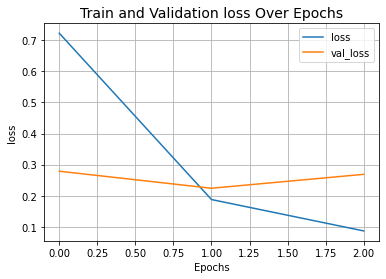

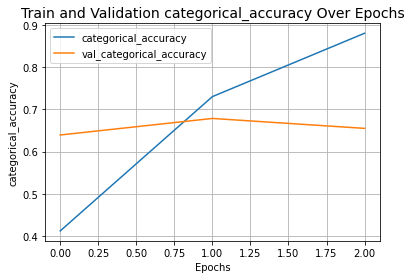

In [431]:
plot_result("loss")
plot_result("categorical_accuracy")

In [432]:
#save model plz


In [433]:
_, _, _, ac = shallow_mlp_model.evaluate(test_dataset)
print(f"Categorical Accuracy on the test set: {round(ac * 100, 2)}%.")

5/5 [==============================] - 0s 51ms/step - loss: 0.2620 - precision_31: 0.7022 - recall_31: 0.5297 - categorical_accuracy: 0.6458
Categorical Accuracy on the test set: 64.58%.


# Predictions

In [434]:
#shallow_mlp_model.save("./Models/workPlzModelAccuracy2")

In [435]:
model_for_inference = tf.keras.Sequential([text_vectorizer, shallow_mlp_model])
#model_for_inference.summary()
# Create a small dataset just for demoing inference.
inference_dataset = make_dataset(test_df.sample(5), is_train=False)
text_batch, label_batch = next(iter(inference_dataset))
predicted_probabilities = model_for_inference.predict(text_batch)

# Perform inference.
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Synopsis: {text}")
    print(f"Tags: {decodeFunc(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_3_labels = [(p,x) for p, x in sorted(
            zip(predicted_proba, topTags.index),
            key=lambda pair: pair[0],
            reverse=True,
        )
                   ]
    print(f"Predicted Label(s): ({', '.join([str(label) for label in top_3_labels])})")
    print(" ")

Synopsis: b'maria owens young witch exiled maria island massachusetts unborn child escaping execution rope meant hang snaps instead lands feet accusing townsfolk lover come rescue desperately casts spell stop falling love spell turns curse affecting coming generations women owens family present day gillian sally owens recent descendants maria owens taken maternal aunts frances jet death parents sally gifted gillian talents charm persuasion subject ridicule youth witnessing aunts cast spell man woman obsessed having love gillian decides fall love sally casts true love spell protect \r\n sisters cast oath blood hands gillian leaves los angeles sally meets marries michael local produce seller years later open botanical shop verbena young daughters kylie antonia michael killed hit truck devastated sally daughters return owens home live aunts realize aunts cast spell finally normal expecting sally michael fall love trigger curse sally decides daughters perform magic gillian begins relations